In [1]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
# import the iris dataset from seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_no_labels = iris.copy().drop('species', axis=1)
iris_no_labels.head()

# our aim would be to recreate the species column using the KMeans algorithm

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# check unique species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# split the data into features and target
X = iris.drop('species', axis=1)
y = iris['species']

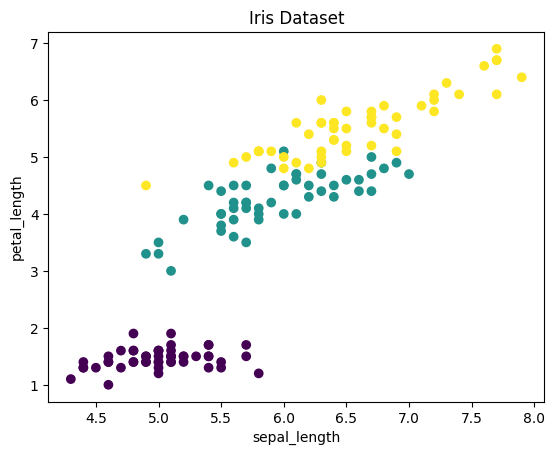

In [6]:
y_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_changed = y.map(y_map)

# Plot the dataset
plt.scatter(X['sepal_length'], X['petal_length'], c=y_changed, cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Iris Dataset')
plt.show()

In [7]:
# Create our Hierarchical clustering

# instantiate the model
hc = AgglomerativeClustering(n_clusters=3)

# fit the model
hc.fit(iris_no_labels)

# add labels to the dataset
iris['predicted_species'] = hc.labels_

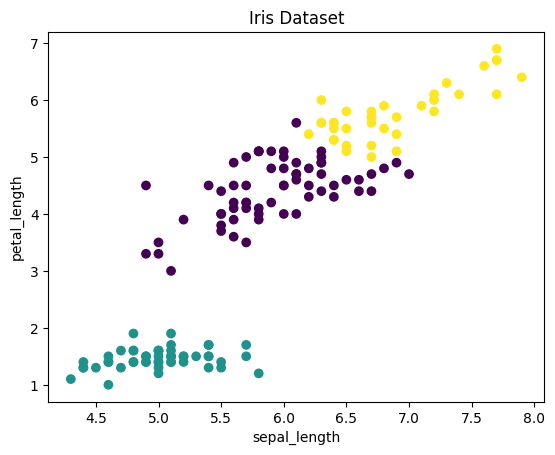

In [8]:
# Plot the dataset
plt.scatter(iris_no_labels['sepal_length'], iris_no_labels['petal_length'], c=iris['predicted_species'], cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Iris Dataset')
plt.show()

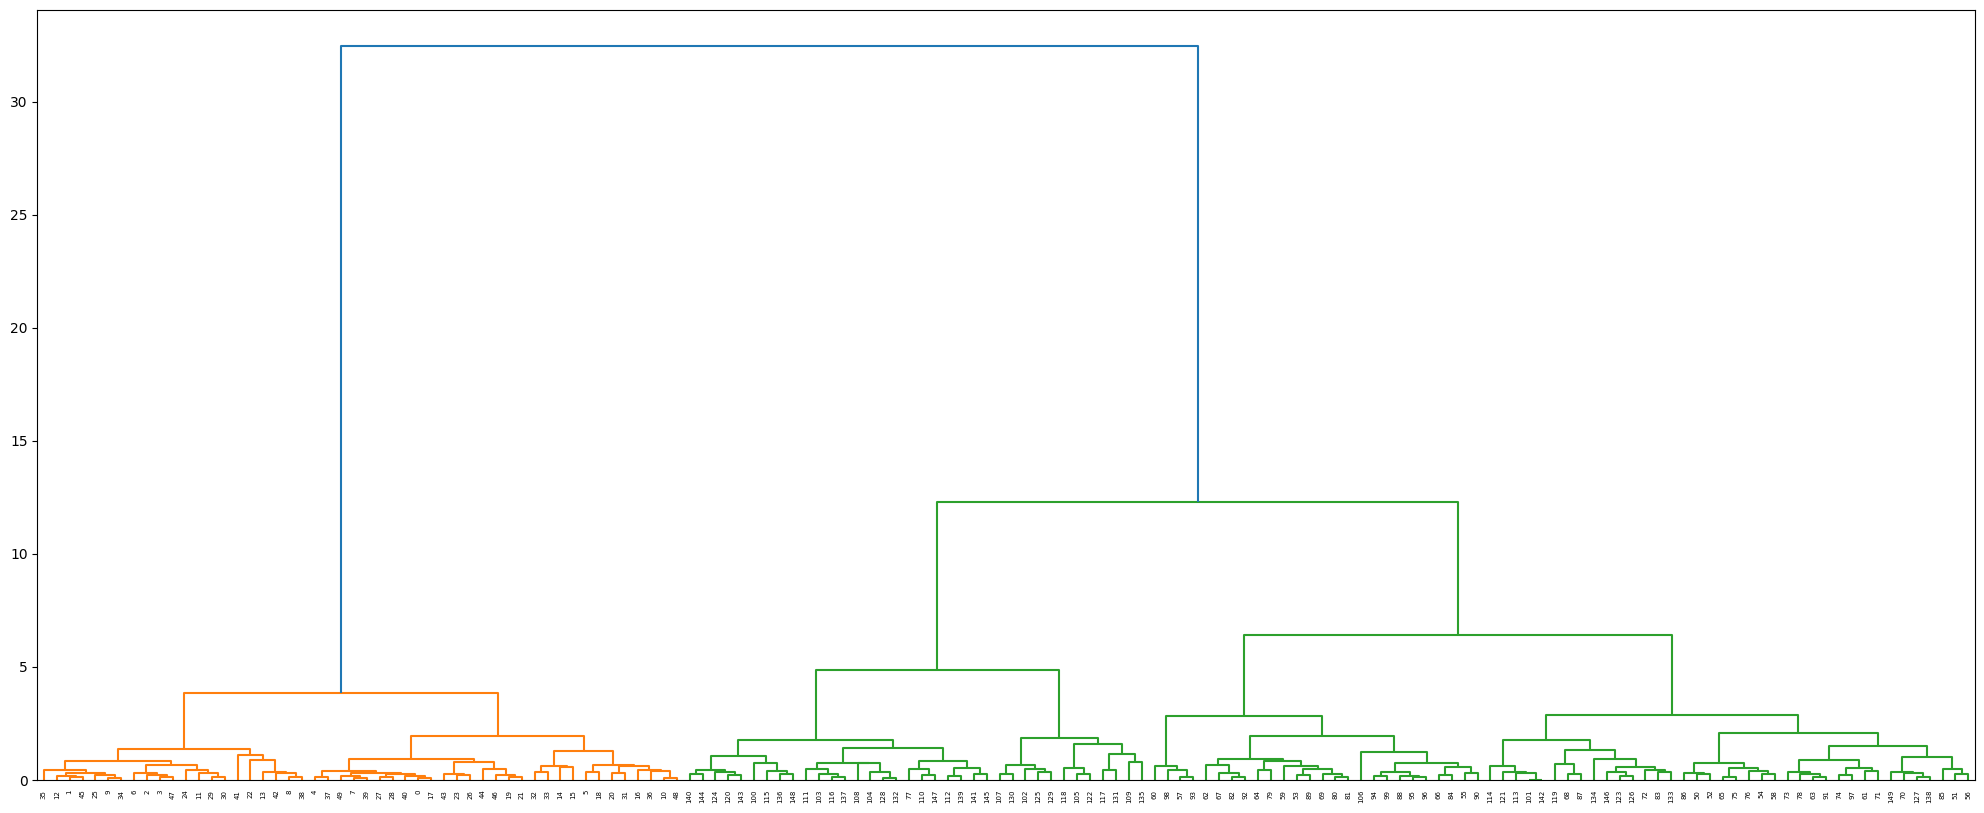

In [10]:
# draw the dendrogram
Z = linkage(iris_no_labels, 'ward')

plt.figure(figsize=(25, 10))
dendrogram(Z);